
**W207_3 machine learning Final group Rossman competition
**Forecast sales using store, promotion, and competitor data**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, 
Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

In their first Kaggle competition, Rossmann is challenging you to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, you will help store managers stay focused on what’s most important to them: their customers and their teams! 

 

If you are interested in joining Rossmann at their headquarters near Hanover, Germany, please contact Mr. Frank König (Frank.Koenig {at} rossmann.de) Rossmann is currently recruiting data scientists at senior and entry-level positions.

https://www.kaggle.com/c/rossmann-store-sales

Started: 12:02 pm, Wednesday 30 September 2015 UTC 
Ends: 11:59 pm, Monday 14 December 2015 UTC (75 total days) 
Points: this competition awards standard ranking points 
Tiers: this competition counts towards tiers

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates
from datetime import datetime
import pandas as pd
import random
import numpy as np
import graphviz as gv

In [2]:
train_data = pd.read_csv('train.csv') #~/Development/kaggle/rossman/data/
test_data = pd.read_csv('test.csv') #~/Development/kaggle/rossman/data/
store_data = pd.read_csv('store.csv') #~/Development/kaggle/rossman/data/

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


This will split up the dataframe into multiple dev, train, and test sets

In [3]:
sample_rows = random.sample(train_data.index, len(train_data)/20)
mini_train_data = train_data.ix[sample_rows[:len(sample_rows)/2]]
dev_data = train_data.ix[sample_rows[len(sample_rows)/2 : len(sample_rows)]]
train_data = train_data.drop(sample_rows)

**Exploratory Analysis**


In [4]:
##sample 1/20 train data and splitting into DEV and MinTrain data
print sample_rows[1:10] 

[285517, 89499, 613221, 712893, 176101, 500808, 286853, 544832, 836706]


In [5]:
print mini_train_data.shape
print dev_data.shape
print train_data.shape
print test_data.shape
print store_data.shape

(25430, 9)
(25430, 9)
(966349, 9)
(41088, 8)
(1115, 10)


In [6]:
print train_data.shape
train_data.head()

(966349, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
print store_data.shape
print store_data.columns
store_data.head()

(1115, 10)
Index([u'Store', u'StoreType', u'Assortment', u'CompetitionDistance',
       u'CompetitionOpenSinceMonth', u'CompetitionOpenSinceYear', u'Promo2',
       u'Promo2SinceWeek', u'Promo2SinceYear', u'PromoInterval'],
      dtype='object')


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN


In [8]:
dev_joined_data = pd.merge(dev_data, store_data, on='Store')

In [9]:
dev_joined_data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
25425,787,5,2013-01-11,10961,1307,1,1,0,0,c,c,3210,6,2009,0,NaN,NaN,NaN
25426,787,6,2014-04-26,6295,774,1,0,0,0,c,c,3210,6,2009,0,NaN,NaN,NaN
25427,787,2,2013-07-09,7893,977,1,0,0,0,c,c,3210,6,2009,0,NaN,NaN,NaN
25428,787,4,2014-12-18,15035,1463,1,1,0,0,c,c,3210,6,2009,0,NaN,NaN,NaN
25429,787,3,2013-05-08,9946,1223,1,0,0,0,c,c,3210,6,2009,0,NaN,NaN,NaN


NameError: name 'plot_df' is not defined

## some of these stores do much better than others ##
* that is evident from differences in the slope of the lines for this sample set
I think we should include slope of historical customer x sales relation when making predictions * 


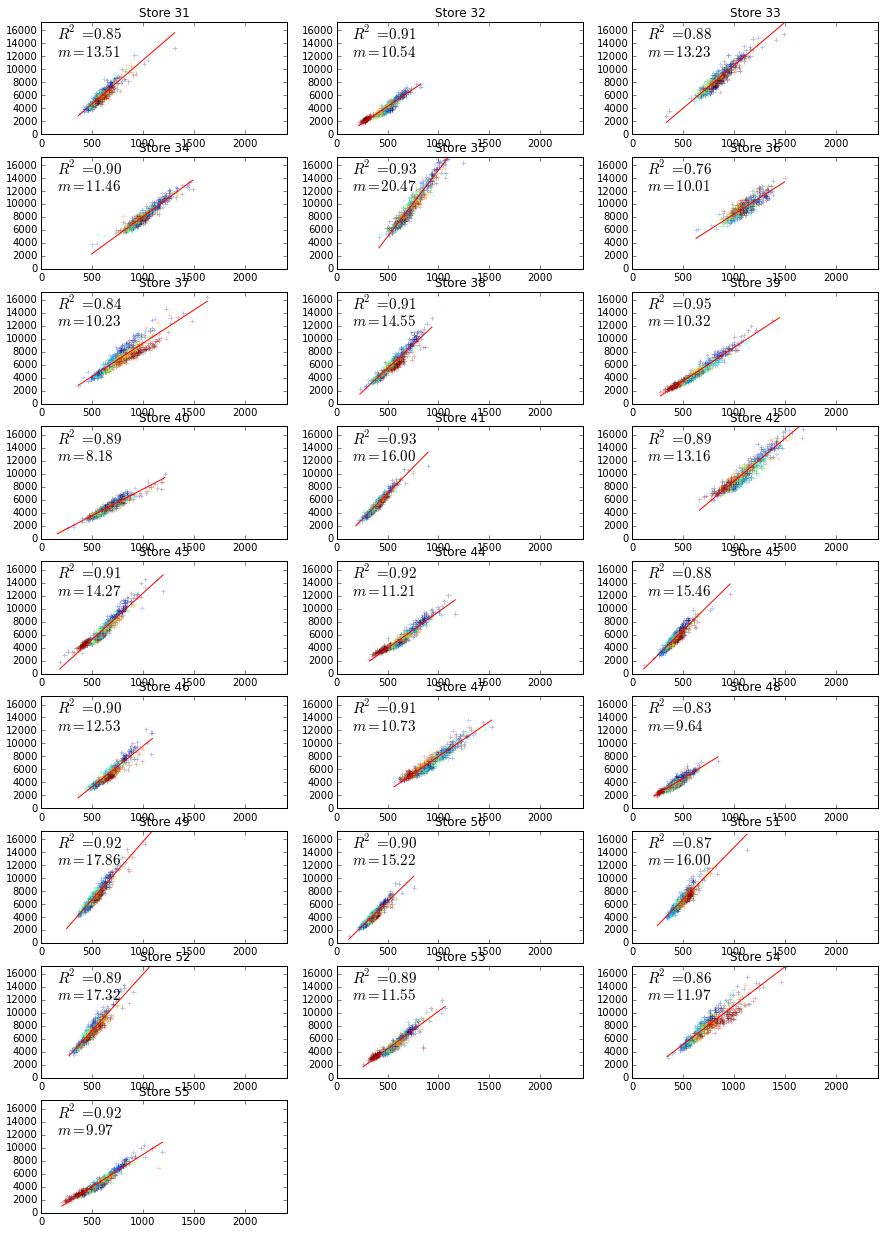

NameError: name 'c' is not defined

In [19]:
ts = train_data.sort(columns='Date')
#store_df = train_data.loc[train_data['Store'] == store]
plt.figure(figsize=(15,60))
num_plots = 25
starting_store = 31
# set uniform axis so most stores fit in 
Xbound=np.percentile(ts.Customers, 99)
Ybound=np.percentile(ts.Sales, 99)

for i in range(0, num_plots):
    ts1 = ts.loc[ts['Store'] == i + starting_store]
    plot_df = ts1[ts1['Sales'] > 500]
    colors = plot_df.DayOfWeek
    plt.subplot(num_plots, 3, i + 1)
    #plt.axis('off')
    plt.title('Store {0}'.format(starting_store + i))
    plt.scatter(plot_df.Customers, plot_df.Sales, marker= "+", c=colors, alpha=.25)
    plt.axis([0, Xbound+150, 0, Ybound+150])

    #plt.ylabel('Sales')
    #plt.xlabel('customer count')
    
    ## ADD A BEST FIT LINE from - http://stackoverflow.com/questions/22239691/code-for-line-of-best-fit-of-a-scatter-plot-in-python
    xd=plot_df.Customers
    yd=plot_df.Sales
    par = np.polyfit(xd, yd, 1, full=True) # determine best fit line

    slope=par[0][0]
    intercept=par[0][1]
    xl = [min(xd), max(xd)]
    yl = [slope*xx + intercept  for xx in xl]

    # coefficient of determination, plot text
    variance = np.var(yd)
    residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
    Rsqr = np.round(1-residuals/variance, decimals=2)
    plt.text(Xbound/15,Ybound*.85,'$R^2 = %0.2f$'% Rsqr, fontsize=15)
    plt.text(Xbound/15,Ybound*.7,'$m = %0.2f$'% slope, fontsize=15)
    plt.plot(xl, yl, '-r')
plt.show()

## add a legend with weekday ##




## the customer volume seems highly predicive of sales##
* ~.9 R squared and seems relatively stable over time for each store on each day of the week. *

I think we should include the:
historical customer volume x store and 
historical customer volume x day of week
when making predictions.

In [15]:
get_legend_handles_labels(plot_df.Customers, plot_df.Sales)

NameError: name 'get_legend_handles_labels' is not defined

###Starting Simple with one store###
Try splitting out the data for a particular store into a separate data frame and let's start with that.

In [38]:
# Pick a random store
store = random.choice(train_data['Store'].tolist())
print store

238


In [39]:
# join the data for this store with the store_data dataframe on the Store column
store_df = pd.merge(train_data[train_data['Store'] == store], store_data, on='Store')
store_df['Date']=pd.to_datetime(store_df['Date']).astype(datetime)
store_df['StateHoliday']=store_df['StateHoliday'].astype(str)
store_df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

Take a look at sales by other variables for this store

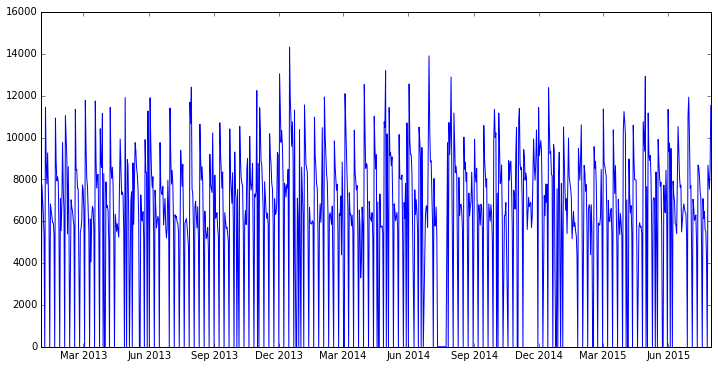

In [40]:
colors = store_df.DayOfWeek
plt.figure(figsize=(12,6))
#plt.subplot(num_plots, 5, i + 1)
#plt.axis('off')
#plt.title('Store {0}'.format(starting_store + i))
plt.plot(store_df.Date, store_df.Sales)


In [41]:
# split the store dataframe into a dev set, a mini training set, a training set, and a test_set
sample_rows = random.sample(store_df.index, len(store_df)/20)
store_mini_train_df = store_df.ix[sample_rows[:len(sample_rows)/2]]
store_dev_df = store_df.ix[sample_rows[len(sample_rows)/2 : len(sample_rows)]]
store_df = store_df.drop(sample_rows)

In [42]:
store_df = store_df[store_df['Sales'] > 500]

In [43]:
# this is a nifty little module that transforms pandas dataframes to numpy arrays
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model

# DayofWeek = numeric, 1-7
# Open, [0,1] = [closed,open]
# Promo, [0,1] = [no promo, promo]
# StateHoliday, [a,b,c,0] = [public holiday, easter holiday, xmas holiday, none]
# SchoolHoliday, [0,1] = [no effect, effect]
# Customers, numeric

data_mapper = DataFrameMapper([
        ('DayOfWeek', None),
        ('Open', None),
        ('Promo', None),
        ('StateHoliday', sklearn.preprocessing.LabelBinarizer()),
        ('SchoolHoliday', None),
        ('Customers', None)       
    ])

label_mapper = DataFrameMapper([
        ('Sales', None)
    ])

#print store_df['DayOfWeek'].tolist() not in [1,2,3,4,5,6,7]
X_t = data_mapper.fit_transform(store_df.copy())
Y_t = label_mapper.fit_transform(store_df.copy())

X_dev = data_mapper.fit_transform(store_dev_df.copy())
Y_dev = label_mapper.fit_transform(store_dev_df.copy())

In [44]:
clf = sklearn.linear_model.LinearRegression()
clf.fit(X_t, Y_t)
print ('Coefficients: \n', clf.coef_)
print ('Residual sum of squares: %.2f' % np.mean((clf.predict(X_dev) - Y_dev) **2))
print ('variance score: %.2f' % clf.score(X_dev, Y_dev))

('Coefficients: \n', array([[  6.84563098e+01,  -3.81456623e-12,   4.08128660e+02,
         -5.31245478e-14,   1.45607882e+02,   8.90128858e+00]]))
Residual sum of squares: 1131691.26
variance score: 0.91


Looking at the different columns and trying to fit a simple linear model indicates that there are some bad data points skewing the data or making it difficult to do computations. Need to determine what those data issues are and clean them up
For example, in the above simple linear regression on single store data, there are stores for which I'm unable to include anything other than sales ~ customers.

It turns out that it's important to make sure that the objects in the pandas dataframe have the right dtype assigned. I forced assignment, above, and I should probably do it when the data is read from disk.

Let's take a look at KNN

In [57]:
mini_train_joined_data = pd.merge(mini_train_data, store_data, on='Store')
dev_joined_data = pd.merge(dev_data, store_data, on='Store')

tjd = pd.merge(train_data, store_data, on='Store')

Im not sure what to do about the NaN columns in this table; it's a result of the join...

In [58]:
data_mapper = DataFrameMapper([
        ('DayOfWeek', sklearn.preprocessing.LabelBinarizer()),
        ('Open', None),
        ('Promo', None),
#        ('StateHoliday', sklearn.preprocessing.LabelBinarizer()),
#        ('SchoolHoliday', None),
        ('Customers', None)       
    ])

label_mapper = DataFrameMapper([
        ('Sales', None)
    ])

X_t = data_mapper.fit_transform(tjd.copy())
Y_t = np.ravel(label_mapper.fit_transform(tjd.copy()))

X_dev = data_mapper.fit_transform(dev_joined_data.copy())
Y_dev = np.ravel(label_mapper.fit_transform(dev_joined_data.copy()))


In [59]:
from sklearn.neighbors import KNeighborsClassifier


In [60]:
neighbors = 5
knn = KNeighborsClassifier(neighbors)
knn.fit(X_t, Y_t)
accuracy = knn.score(X_dev, Y_dev)
print 'Accuracy = %.4f' %(accuracy)

Accuracy = 0.1681


The joined data sets don't seem to work all that well. Let's try just the plain data set without the added store info.

In [61]:
data_mapper = DataFrameMapper([
        ('DayOfWeek', sklearn.preprocessing.LabelBinarizer()),
        ('Open', None),
        ('Promo', None),
#        ('StateHoliday', sklearn.preprocessing.LabelBinarizer()),
#        ('SchoolHoliday', None),
        ('Customers', None)       
    ])

label_mapper = DataFrameMapper([
        ('Sales', None)
    ])

X_t = data_mapper.fit_transform(mini_train_data.copy())
Y_t = np.ravel(label_mapper.fit_transform(mini_train_data.copy()))

X_dev = data_mapper.fit_transform(dev_data.copy())
Y_dev = np.ravel(label_mapper.fit_transform(dev_data.copy()))

In [62]:
neighbors = 5
knn = KNeighborsClassifier(neighbors)
knn.fit(X_t, Y_t)
accuracy = knn.score(X_dev, Y_dev)
print 'Accuracy = %.4f' %(accuracy)

Accuracy = 0.1683


So K-NN isn't doint that well on the mini training data set. Let's try decision trees...


In [63]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [64]:
data_mapper = DataFrameMapper([
        ('DayOfWeek', sklearn.preprocessing.LabelBinarizer()),
        ('Open', None),
        ('Promo', None),
#        ('StateHoliday', sklearn.preprocessing.LabelBinarizer()),
#        ('SchoolHoliday', None),
        ('Customers', None)       
    ])

label_mapper = DataFrameMapper([
        ('Sales', None)
    ])

X_t = data_mapper.fit_transform(mini_train_data.copy())
Y_t = np.ravel(label_mapper.fit_transform(mini_train_data.copy()))

X_dev = data_mapper.fit_transform(dev_data.copy())
Y_dev = np.ravel(label_mapper.fit_transform(dev_data.copy()))